In [1]:
import pandas as pd
file=pd.read_csv("C:/Users/ASUS/data science calss/Raisin_Dataset.csv")
df=pd.DataFrame(file)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [5]:
df.shape

(900, 8)

In [6]:
y=df['Class']

In [8]:
x=df.drop(['Class'],axis=1).values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',probability= True, random_state=0)
classifier.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [16]:
classifier.fit(x_train, y_train)

SVC(probability=True, random_state=0)

In [18]:
y_pred=classifier.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[84, 13],
       [ 5, 78]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.87      0.90        97\n           1       0.86      0.94      0.90        83\n\n    accuracy                           0.90       180\n   macro avg       0.90      0.90      0.90       180\nweighted avg       0.90      0.90      0.90       180\n'

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
y_proba=classifier.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.09204675 0.87205323 0.11731389 0.86967313 0.02086219 0.01232551
 0.12413668 0.94228352 0.95065633 0.2128605  0.06533499 0.90313144
 0.95174852 0.66009881 0.2082814  0.58650867 0.67990406 0.02865239
 0.1568183  0.12498409 0.80708135 0.01589852 0.02025476 0.04820489
 0.76065932 0.87858171 0.82562054 0.04030875 0.18871363 0.03235705
 0.86249829 0.03001749 0.91643119 0.42240585 0.0672333  0.08722786
 0.8688812  0.82471413 0.01161846 0.21614985 0.88179465 0.91244395
 0.92954564 0.4493436  0.35038441 0.02136284 0.90708016 0.89771853
 0.90485647 0.03436308 0.91669188 0.92182119 0.95206475 0.90232978
 0.0290253  0.85040487 0.87657873 0.07265113 0.88449892 0.92448218
 0.03000874 0.89886862 0.84827473 0.03742432 0.53451171 0.12099506
 0.01158077 0.02281518 0.55875187 0.06121079 0.0599074  0.0854668
 0.84374123 0.06508388 0.81101819 0.30553315 0.09341536 0.89057818
 0.70160545 0.70887516 0.89384009 0.02737458 0.01566393 0.87384709
 0.03898886 0.02277725 0.01098942 0.1210097  0.91430637 0.74057

In [27]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [29]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9318097130791205


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

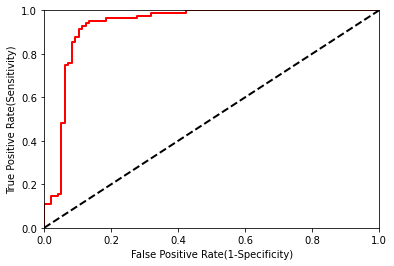

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')